In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train_csv = pd.read_csv('/kaggle/input/kma-ml2/train.csv/train.csv')
test_csv = pd.read_csv('/kaggle/input/kma-ml2/test.csv/test.csv')
sample_sub = pd.read_csv('/kaggle/input/kma-ml2/sample_submission.csv/sample_submission.csv')

In [3]:
print(train_csv["comment_text"][0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


159571


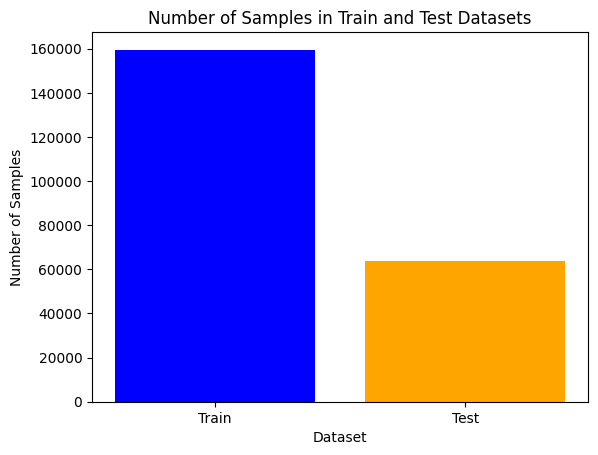

In [4]:
import matplotlib.pyplot as plt

train_samples = train_csv["id"].size
test_samples = test_csv["id"].size
print(train_samples)

labels = ['Train', 'Test']
samples = [train_samples, test_samples]

plt.bar(labels, samples, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Train and Test Datasets')
plt.show()

In [6]:
tweets = train_csv["comment_text"]
len(tweets)

159571

In [8]:
import string

num_words_all = []
num_chars_all = []
num_symbols_all = []
num_capital_letters_all = []
for tweet in tweets:
    words = tweet.split()
    num_words = len(words)
    num_words_all.append(num_words)

    num_chars = len(tweet)
    num_chars_all.append(num_chars)

    num_symbols = sum(1 for char in tweet if char in string.punctuation)
    num_symbols_all.append(num_symbols)

    num_capital_letters = sum(1 for char in tweet if char.isupper())
    num_capital_letters_all.append(num_capital_letters)

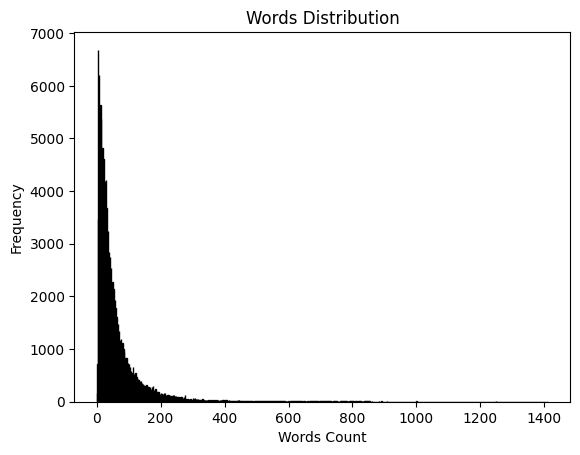

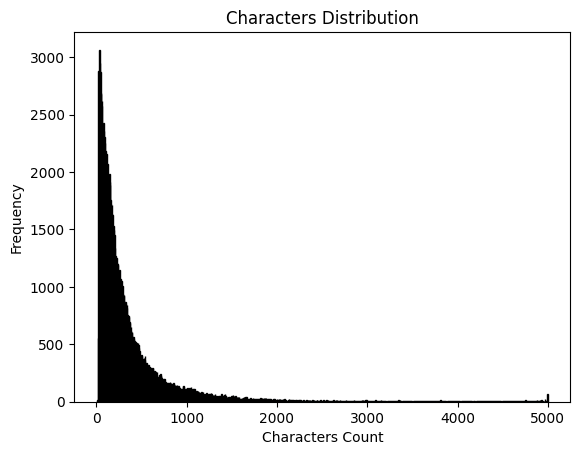

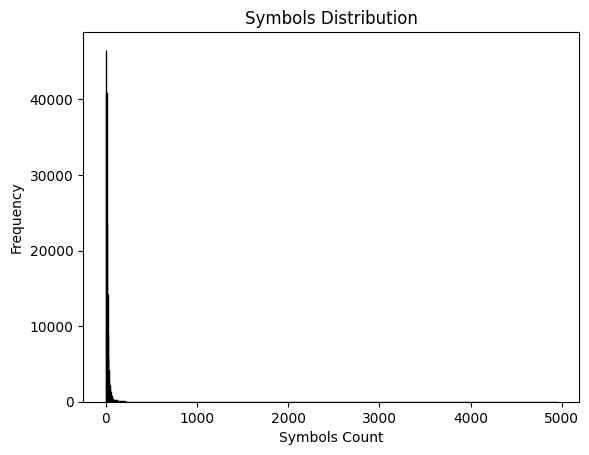

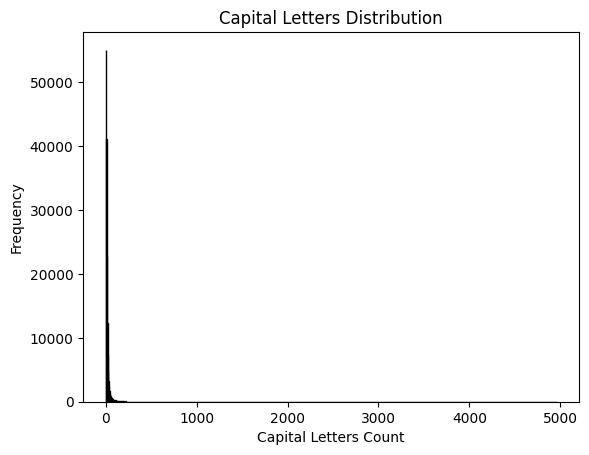

In [9]:
categories = ['Words', 'Characters', 'Symbols', 'Capital Letters']
values_list = [num_words_all, num_chars_all, num_symbols_all, num_capital_letters_all]

for category, values in zip(categories, values_list):
    plt.figure()
    plt.hist(values, bins=1000, color='skyblue', edgecolor='black')
    plt.xlabel(f'{category} Count')
    plt.ylabel('Frequency')
    plt.title(f'{category} Distribution')
    plt.show()

In [10]:
char_frequency_dict = {}
capital_letters_frequency_dict = {}
for tweet in tweets:
    for char in tweet:
        char_frequency_dict[char] = char_frequency_dict.get(char, 0) + 1

    capital_letters = [char for char in tweet if char.isupper()]
    for char in capital_letters:
        capital_letters_frequency_dict[char] = capital_letters_frequency_dict.get(char, 0) + 1

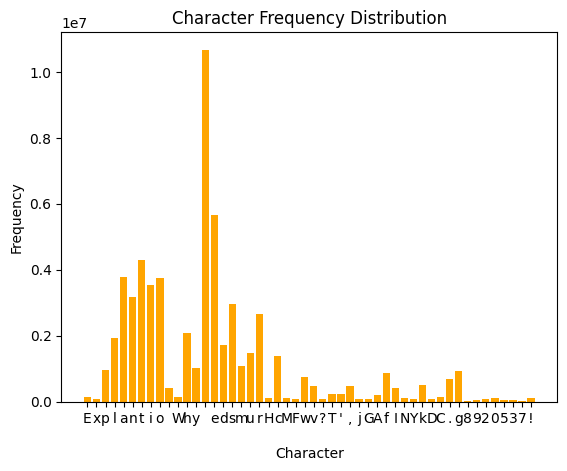

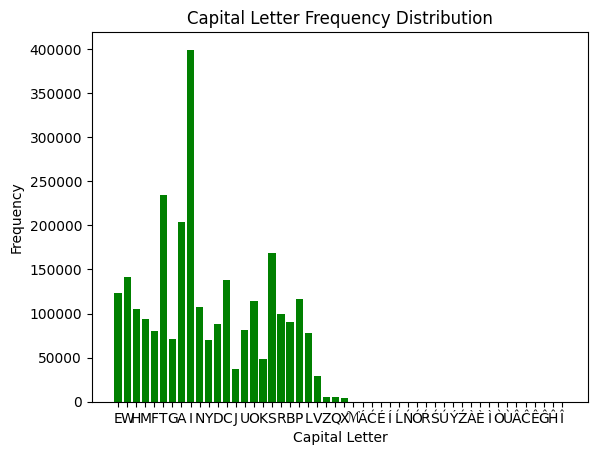

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.figure()
plt.bar(list(char_frequency_dict.keys())[:50], list(char_frequency_dict.values())[:50], color='orange')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()

plt.figure()
plt.bar(list(capital_letters_frequency_dict.keys())[:50], list(capital_letters_frequency_dict.values())[:50], color='green')
plt.xlabel('Capital Letter')
plt.ylabel('Frequency')
plt.title('Capital Letter Frequency Distribution')
plt.show()

159571


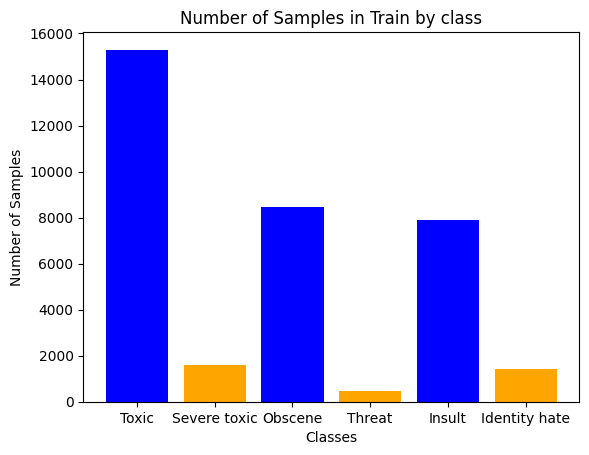

In [31]:
import matplotlib.pyplot as plt

train_toxic = sum(train_csv["toxic"])
train_severe_toxic = sum(train_csv["severe_toxic"])
train_obscene = sum(train_csv["obscene"])
train_threat = sum(train_csv["threat"])
train_insult = sum(train_csv["insult"])
train_identity_hate = sum(train_csv["identity_hate"])

print(train_samples)

labels = ['Toxic', 'Severe toxic', 'Obscene', 'Threat', 'Insult', 'Identity hate']
samples = [train_toxic, train_severe_toxic, train_obscene, train_threat, train_insult, train_identity_hate]

plt.bar(labels, samples, color=['blue', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Train by class')
plt.show()

In [69]:
import matplotlib.pyplot as plt

combination = {}
for i, row in train_csv.iterrows():
    key = []
    if row["toxic"] == 1:
        key.append("toxic")
    if row["severe_toxic"] == 1:
        key.append("severe_toxic")
    if row["obscene"] == 1:
        key.append("obscene")
    if row["threat"] == 1:
        key.append("threat")
    if row["insult"] == 1:
        key.append("insult")
    if row["identity_hate"] == 1:
        key.append("identity_hate")
    combination[tuple(key)] = combination.get(tuple(key), 0) + 1

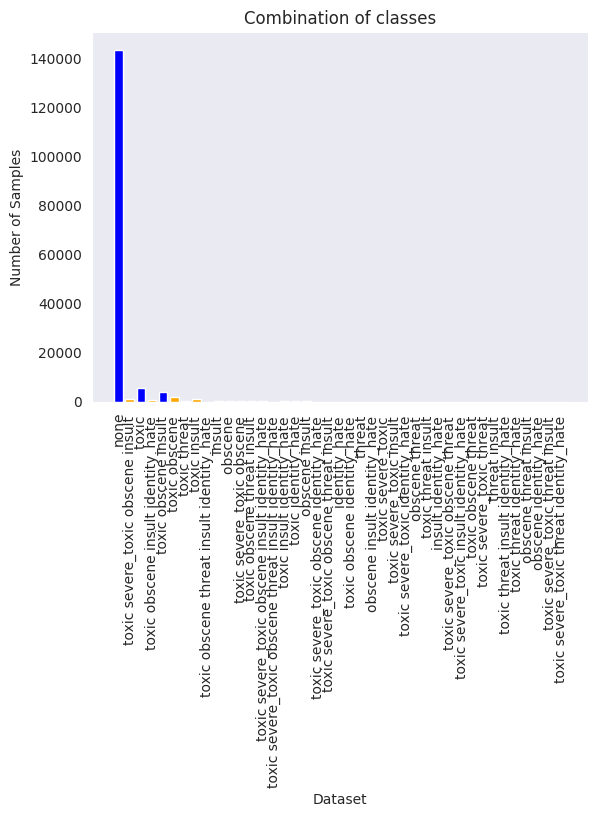

In [70]:
arr = []
for i in combination.keys():
    stri = ""
    for j in list(i):
        stri += j + " "
    if (stri == ""):
        stri += "none"
    arr.append(stri)

# print(arr)
labels = arr
samples = list(combination.values())

plt.bar(labels, samples, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Combination of classes')
plt.xticks(rotation='vertical')
plt.show()

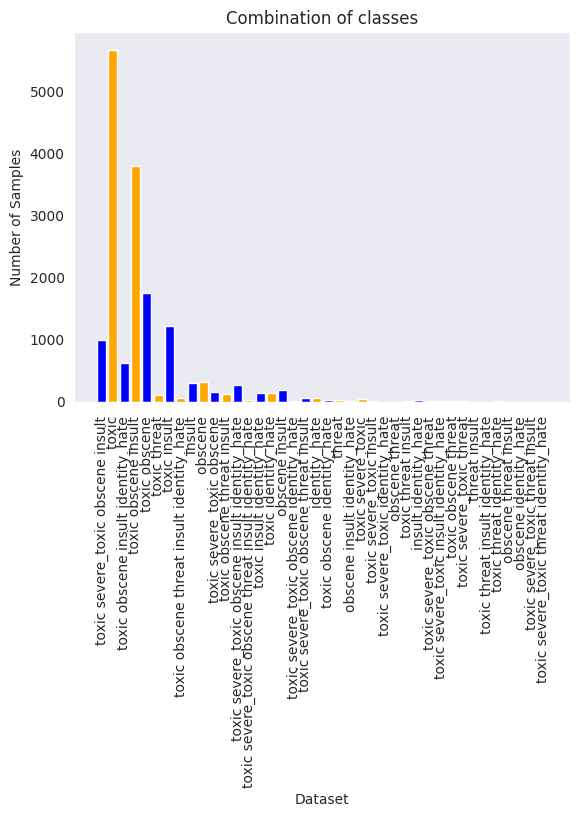

In [72]:
arr = []
for i in combination.keys():
    stri = ""
    for j in list(i):
        stri += j + " "
    if (stri != ""):
        arr.append(stri)

# print(arr)
labels = arr
combination.pop(())
samples = list(combination.values())

plt.bar(labels, samples, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Combination of classes')
plt.xticks(rotation='vertical')
plt.show()

In [40]:
import matplotlib.pyplot as plt
from itertools import islice
import re

def get_top_words(class_):
    words_ = {}
    for i, row in train_csv.iterrows():
        text = row["comment_text"]
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        if row[class_] == 1:
            for j in text.split():
                words_[j] = words_.get(j, 0) + 1
    sorted_words_ = dict(sorted(words_.items(), key=lambda item: item[1], reverse=True))
    top_100 = dict(islice(sorted_words_.items(), 100))

    return top_100

In [41]:
top_toxic = get_top_words("toxic")

{'you': 35329,
 'the': 20451,
 'a': 20370,
 'i': 19896,
 'to': 15655,
 'and': 15647,
 'is': 12628,
 'of': 11386,
 'your': 9114,
 'fuck': 8615,
 'are': 8152,
 'that': 7736,
 'it': 6831,
 'in': 6663,
 'my': 6170,
 'this': 5432,
 'me': 5389,
 'on': 4858,
 'not': 4809,
 'for': 4705,
 'have': 4609,
 'with': 3916,
 'do': 3860,
 'shit': 3587,
 'be': 3571,
 'dont': 3566,
 'like': 3478,
 'all': 3432,
 'an': 3301,
 'nigger': 3289,
 'wikipedia': 3263,
 'fucking': 3194,
 'what': 3189,
 'am': 3096,
 'so': 3055,
 'suck': 3036,
 'as': 3013,
 'go': 2834,
 'will': 2823,
 'hate': 2614,
 'if': 2606,
 'ass': 2601,
 'u': 2584,
 'just': 2459,
 'was': 2406,
 'but': 2342,
 'up': 2336,
 'who': 2298,
 'no': 2291,
 'get': 2283,
 'or': 2276,
 'about': 2265,
 'can': 2237,
 'gay': 2224,
 'know': 2182,
 'page': 2116,
 'die': 2077,
 'im': 2052,
 'he': 1989,
 'fat': 1967,
 'because': 1957,
 'faggot': 1957,
 'yourself': 1941,
 'by': 1930,
 'from': 1898,
 'moron': 1861,
 'youre': 1811,
 'people': 1802,
 'off': 1774,
 'i

In [42]:
top_severe_toxic = get_top_words("severe_toxic")
print(top_severe_toxic)

{'you': 9669, 'fuck': 6049, 'i': 3338, 'a': 3043, 'suck': 2341, 'the': 2144, 'your': 2055, 'shit': 1878, 'ass': 1828, 'is': 1617, 'faggot': 1570, 'and': 1564, 'u': 1400, 'fucking': 1374, 'my': 1304, 'go': 1240, 'yourself': 1239, 'are': 1210, 'to': 1162, 'of': 1156, 'die': 1155, 'nigger': 1011, 'in': 991, 'sucks': 961, 'me': 905, 'cunt': 833, 'bitch': 766, 'wikipedia': 681, 'cock': 679, 'this': 657, 'will': 653, 'up': 627, 'fucksex': 624, 'yourselfgo': 621, 'fucker': 585, 'kill': 580, 'all': 574, 'it': 523, 'cocksucker': 508, 'dick': 508, 'off': 503, 'piece': 502, 'mothjer': 489, 'an': 483, 'bastard': 480, 'gay': 476, 'asshole': 456, 'huge': 424, 'am': 419, 'shut': 407, 'fat': 406, 'damn': 398, 'rape': 383, 'that': 382, 'dog': 375, 'stupid': 368, 'offfuck': 360, 'mexicans': 358, 'anal': 350, 'proassadhanibalyoure': 345, 'like': 340, 'youre': 340, 'eat': 340, 'niggas': 337, 'd': 335, 'can': 334, 'with': 333, 'bitchesfuck': 333, 'pussy': 330, 'dickhead': 329, 'get': 326, 'block': 318, 'yo

In [43]:
top_obscene = get_top_words("obscene")
print(top_obscene)

{'you': 21828, 'a': 11547, 'the': 10664, 'i': 10356, 'fuck': 8540, 'and': 8217, 'to': 7357, 'is': 5910, 'of': 5440, 'your': 5414, 'are': 4025, 'that': 3678, 'my': 3658, 'in': 3509, 'it': 3494, 'shit': 3187, 'fucking': 3098, 'this': 2921, 'suck': 2823, 'me': 2736, 'nigger': 2721, 'ass': 2520, 'on': 2500, 'for': 2462, 'have': 2230, 'go': 2118, 'not': 2095, 'u': 2056, 'with': 2021, 'do': 1866, 'all': 1865, 'dont': 1767, 'what': 1677, 'wikipedia': 1637, 'so': 1634, 'be': 1617, 'up': 1541, 'like': 1528, 'cunt': 1518, 'an': 1470, 'off': 1452, 'yourself': 1450, 'will': 1412, 'bitch': 1401, 'get': 1399, 'as': 1374, 'if': 1325, 'can': 1288, 'fat': 1281, 'no': 1240, 'just': 1206, 'was': 1200, 'die': 1169, 'know': 1169, 'faggot': 1163, 'dick': 1152, 'about': 1140, 'im': 1114, 'who': 1104, 'or': 1099, 'bullshit': 1086, 'but': 1080, 'youre': 1079, 'page': 1070, 'sucks': 1067, 'because': 999, 'stupid': 947, 'he': 946, 'its': 946, 'asshole': 944, 'from': 919, 'cock': 915, 'am': 858, 'hate': 832, 'nip

In [44]:
top_threat = get_top_words("threat")
print(top_threat)

{'you': 1965, 'i': 1944, 'die': 1165, 'will': 840, 'ass': 769, 'to': 645, 'and': 601, 'your': 506, 'kill': 504, 'the': 445, 'a': 349, 'going': 294, 'am': 273, 'if': 268, 'of': 232, 'it': 217, 'yourself': 193, 'in': 189, 'block': 170, 'must': 166, 'jim': 158, 'wales': 157, 'supertrll': 150, 'dont': 145, 'that': 143, 'are': 140, 'fucking': 136, 'fuck': 134, 'im': 133, 'ban': 132, 'me': 129, 'is': 129, 'my': 128, 'page': 128, 'wikipedia': 117, 'be': 116, 'talk': 112, 'murder': 107, 'on': 102, 'live': 101, 'fuckin': 101, 'for': 100, 'this': 96, 'rvv': 96, 'blank': 94, 'di': 90, 'edie': 90, 'again': 86, 'out': 85, 'have': 82, 'go': 82, 'pathetic': 81, 'forever': 80, 'over': 79, 'do': 78, 'with': 78, 'respect': 76, 'fool': 76, 'all': 73, 'shit': 70, 'get': 69, 'bitch': 67, 'so': 67, 'hope': 65, 'take': 64, 'ill': 62, 'off': 62, 'or': 61, 'not': 60, 'up': 59, 'lifetime': 58, 'as': 56, 'what': 54, 'u': 53, 'who': 53, 'dust': 53, 'filter': 53, 'like': 52, 'steal': 52, 'continue': 51, 'password'

In [45]:
top_identity_hate = get_top_words("identity_hate")
print(top_identity_hate)

{'nigger': 2963, 'you': 2735, 'a': 2069, 'is': 1914, 'and': 1610, 'i': 1533, 'the': 1405, 'fat': 1321, 'jew': 1309, 'to': 1118, 'gay': 911, 'of': 899, 'die': 879, 'fuck': 875, 'are': 700, 'faggot': 685, 'your': 615, 'that': 563, 'fucking': 518, 'in': 508, 'it': 483, 'me': 434, 'huge': 429, 'suck': 427, 'shit': 407, 'stupid': 396, 'cunt': 392, 'like': 382, 'ass': 368, 'mexicans': 365, 'bitch': 345, 'niggas': 342, 'this': 341, 'my': 340, 'with': 327, 'on': 322, 'have': 322, 'for': 293, 'be': 292, 'hate': 290, 'go': 284, 'not': 280, 'bunksteve': 278, 'u': 258, 'do': 247, 'get': 245, 'so': 239, 'if': 231, 'tommy': 230, 'all': 227, 'he': 222, 'dont': 215, 'yourself': 215, 'who': 214, 'as': 213, 'cant': 209, 'ancestryfuckoffjewish': 207, 'what': 204, 'down': 202, 'kill': 197, 'they': 191, 'or': 190, 'just': 187, 'jews': 183, 'licker': 181, 'fan': 181, 'spanish': 181, 'youre': 179, 'centraliststupid': 179, 'people': 175, 'will': 171, 'piece': 171, 'was': 169, 'nigga': 168, 'about': 167, 'keep

In [4]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
# from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [14]:
x=train_csv.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train_csv.iloc[:,2:].sum(axis=1)
train_csv['clean']=(rowsums==0)
#count number of clean entries
train_csv['clean'].sum()
print("Total comments = ",len(train_csv))
print("Total clean comments = ",train_csv['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


<Axes: >

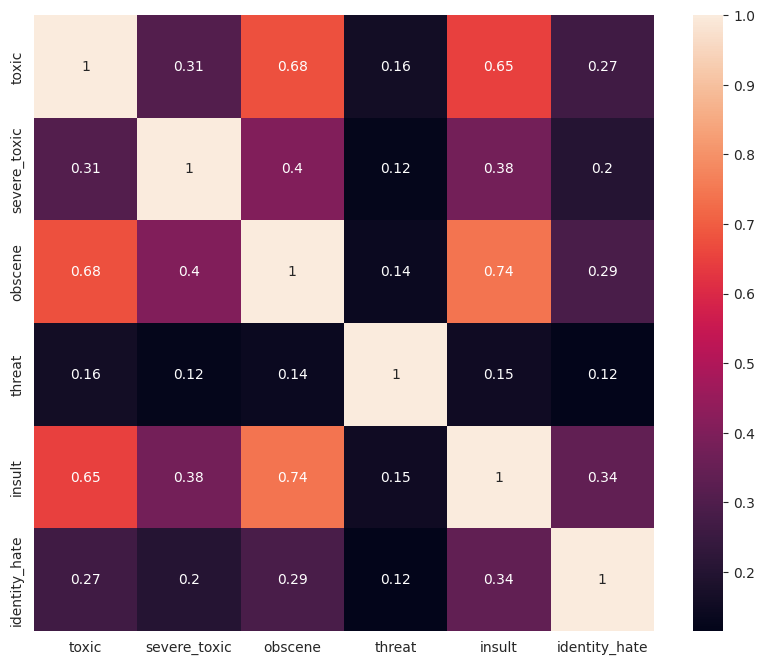

In [53]:
temp_df=train_csv.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [54]:
def highlight_min(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [55]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)

In [56]:
out

In [5]:
import re
merge=pd.concat([train_csv.iloc[:,0:2],test_csv.iloc[:,0:2]])
df=merge.reset_index(drop=True)
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n", str(x)))+1)
#Word count in each comment:
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [7]:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
df['punct_percent']=df['count_punctuations']*100/df['count_word']